In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

In [3]:
df_astronomical_data = pd.read_csv('cleaned_star_data.csv')
df_astronomical_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


#### Display the info

In [4]:
df_astronomical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Info DF

##### The dataset consist of 240 rows and 7 columns. The columns are:
- Temperature (K): Representing the absolute temperature of the star in kelvin.
- Luminosity (L/Lo): Representing the luminosity of the star relative to the luminosity of the Sun.
- Radius (R/Ro): Representing the radius of the star relative to the radius of the Sun.
- Absolute Magnitude (Mv): Representing the absolute magnitude of the star
- Star Color: Representing the color of the star (Depending on the temperature). It is a categorical data column.
- Spectral Class: Representing the spectrum of the star (Depending on the temperature). It is a categorical data column.
- Star Type: Representing the type of the star based on the previous properties

##### The corrisponding encoding of the column "Star Type" is the following
- 0 = Brown Dwarf 
- 1 = Red Dwarf 
- 2 = White Dwarf 
- 3 = Main Sequence
- 4 = Supergiants
- 5 = Hypergiants

#### Visualize the count for every type of star present

Printing the value value_counts we expect to have the exact same number for all the kind of stars

In [5]:
df_astronomical_data['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

#### Visualization with Matplotlib

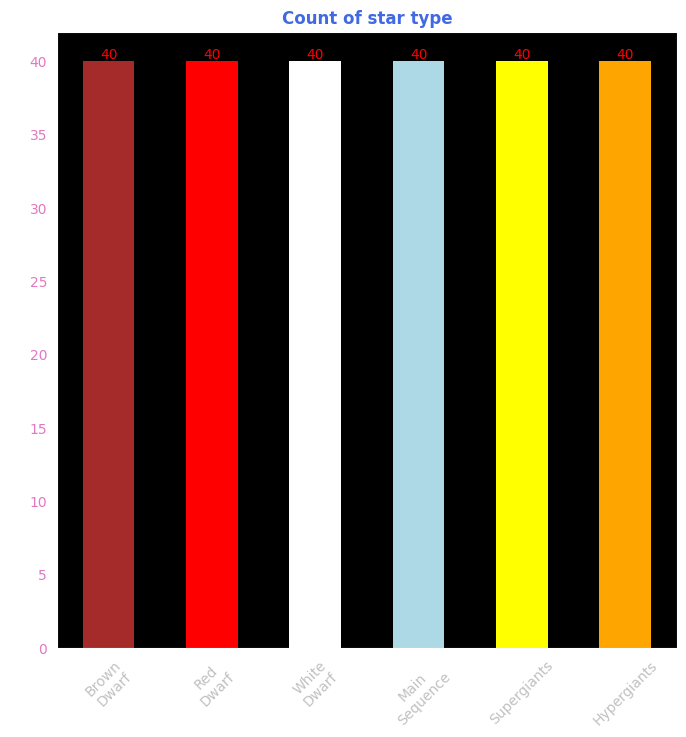

In [6]:
plt.figure(figsize=(8,8))
plt.style.use('dark_background')
plot_colors=['brown', 'red', 'white', 'lightblue', 'yellow', 'orange']
ax = df_astronomical_data['Star type'].value_counts().plot(kind='bar', color=plot_colors)
ax.bar_label(ax.containers[0], color='red')
plt.title('Count of star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('Number of stars', fontsize=10)
star_type_labels = ['Brown\nDwarf','Red\nDwarf','White\nDwarf','Main\nSequence','Supergiants','Hypergiants',]
plt.xticks(ticks=range(6), labels=star_type_labels, rotation=45, color='silver')
plt.savefig(f'plots/count_of_star_type_plt.png')
plt.show()

#### Visualization with Matplotlib and Seaborn of star color

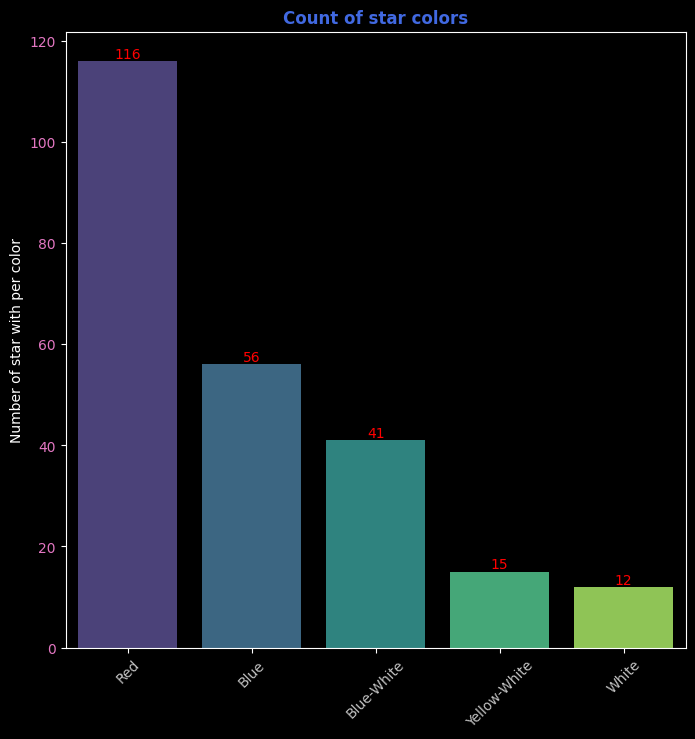

In [7]:
plt.figure(figsize=(8,8))
ax = sns.barplot(
    x=df_astronomical_data['Star color'].value_counts().index, 
    y=df_astronomical_data['Star color'].value_counts(),
    palette='viridis'
)
ax.bar_label(ax.containers[0], color='red')
plt.title('Count of star colors', color='royalblue', weight='bold')
plt.xticks(rotation=45, color='silver')
plt.yticks(color='tab:pink')
plt.ylabel('Number of star with per color', fontsize=10)
plt.savefig(f'plots/count_of_star_colors.png')
plt.show()

#### Boxplot creation

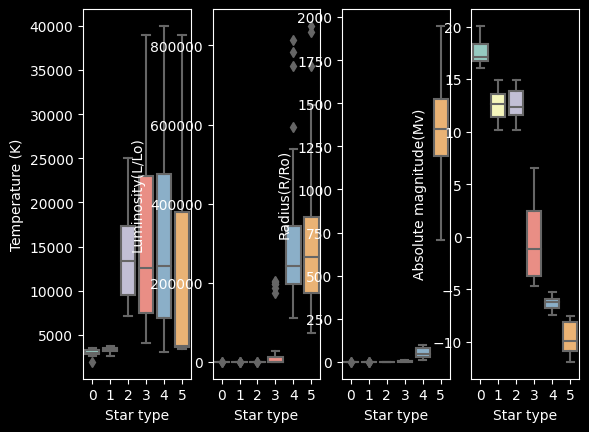

In [8]:
plt.subplot(1,4,1)
sns.boxplot(x=df_astronomical_data['Star type'], y=df_astronomical_data['Temperature (K)'])
plt.subplot(1,4,2)
sns.boxplot(x=df_astronomical_data['Star type'], y=df_astronomical_data['Luminosity(L/Lo)'])
plt.subplot(1,4,3)
sns.boxplot(x=df_astronomical_data['Star type'], y=df_astronomical_data['Radius(R/Ro)'])
plt.subplot(1,4,4)
sns.boxplot(x=df_astronomical_data['Star type'], y=df_astronomical_data['Absolute magnitude(Mv)'])
plt.show()

#### Best way to do it using for loop

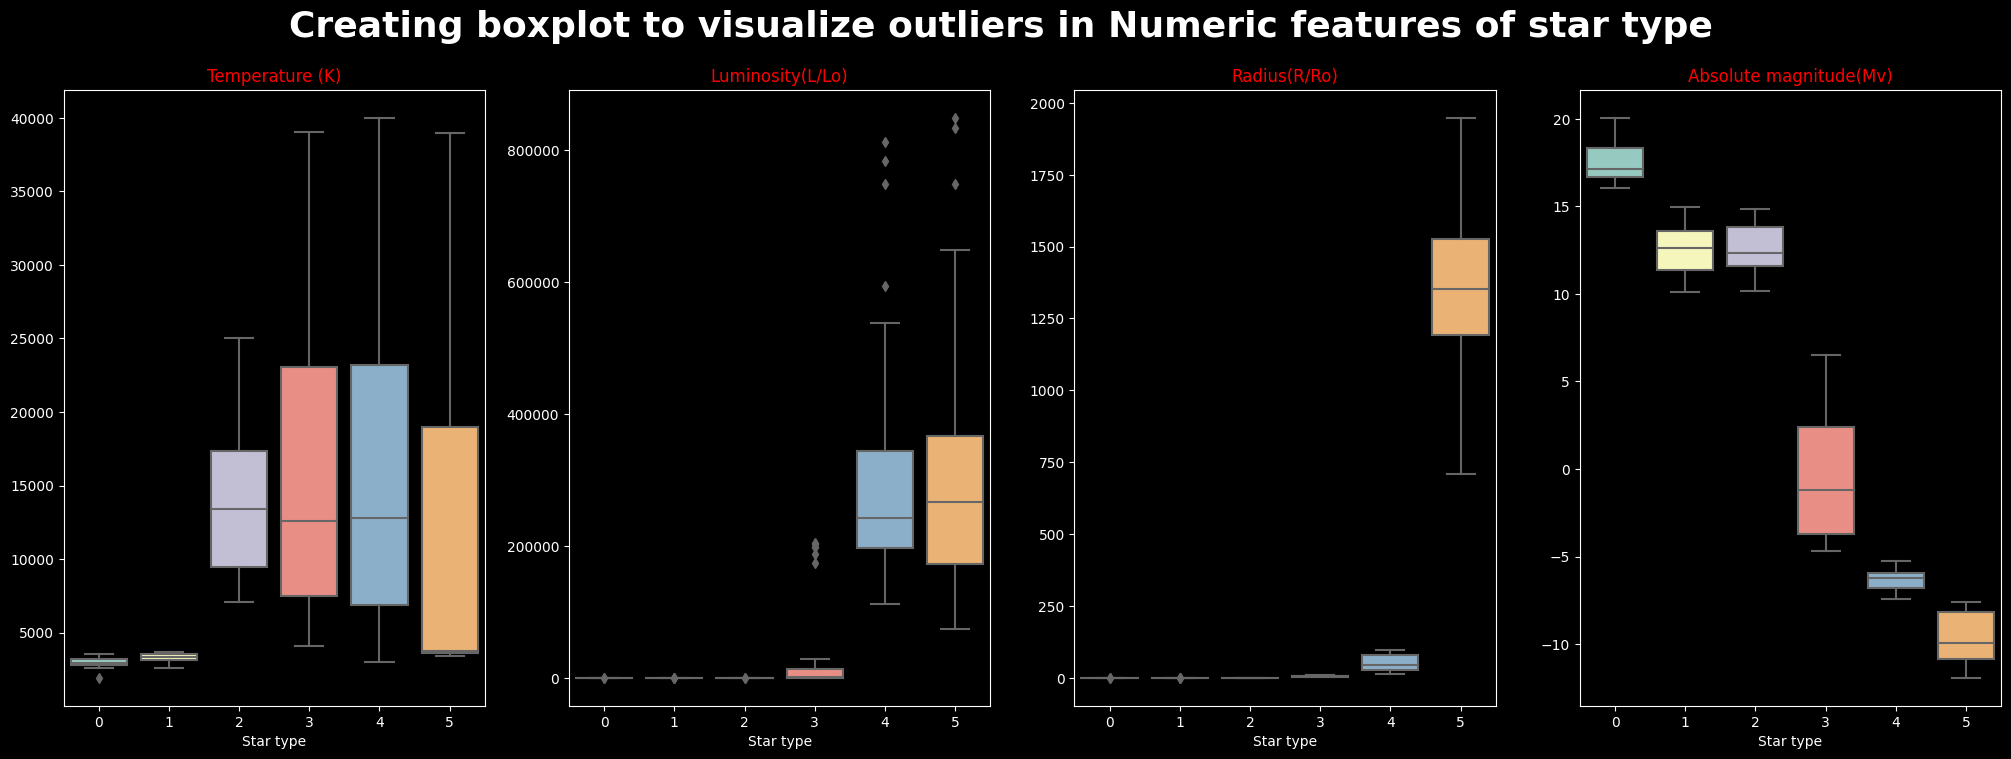

In [9]:
plt.figure(figsize=(25,8))
# plt.style.use('default')
plt.suptitle('Creating boxplot to visualize outliers in Numeric features of star type', weight='bold', fontsize=26)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=df_astronomical_data['Star type'], y=df_astronomical_data.iloc[:, i])
    plt.title(df_astronomical_data.columns[i], color='red')
    plt.ylabel('')

plt.savefig('plots/boxplot_star_type.png')
plt.show()

#### Create line plot to see the distribution of numeric features

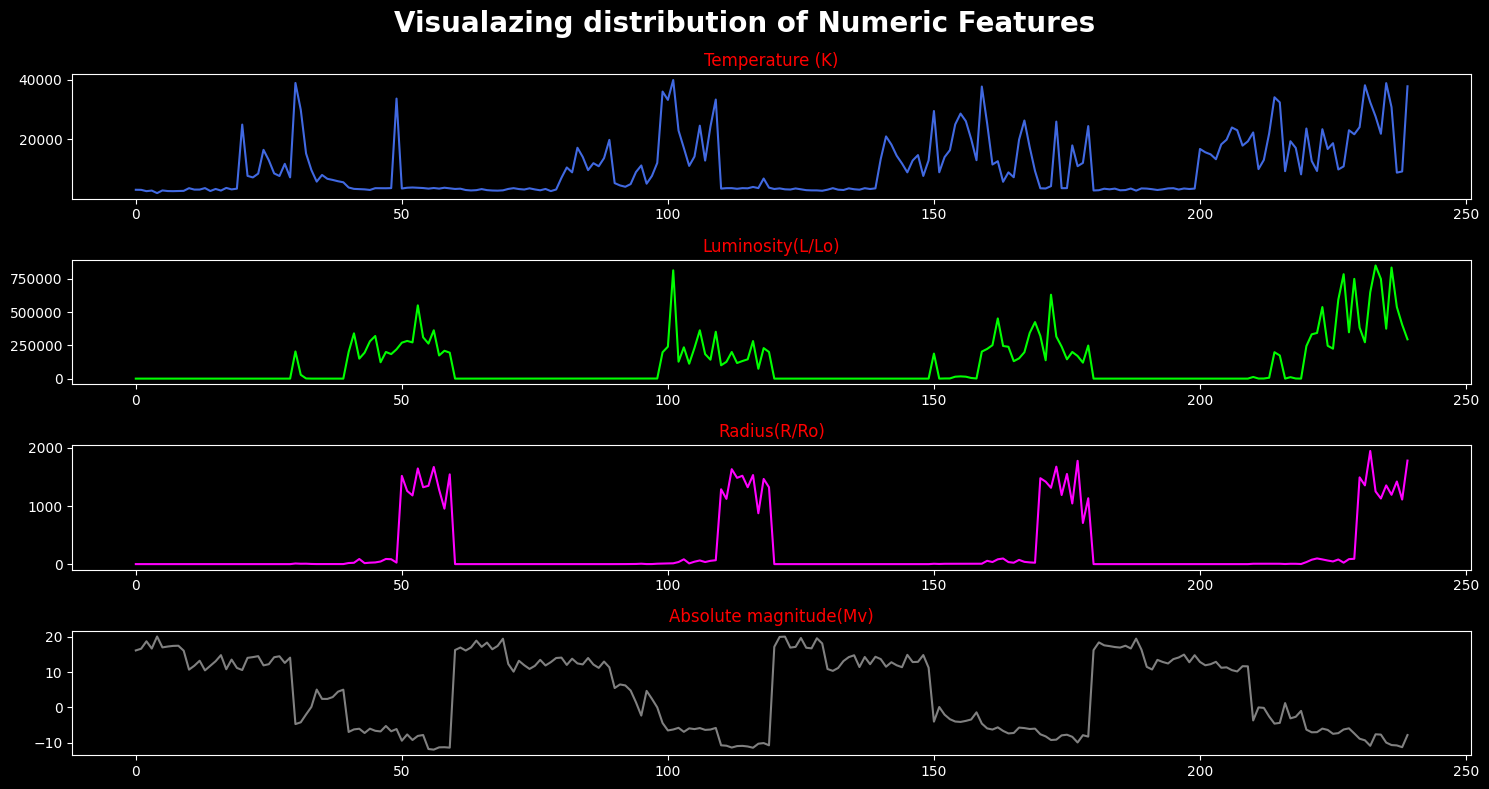

In [10]:
colors=['royalblue', 'lime', 'magenta', 'gray']

plt.figure(figsize=(15,8))
plt.suptitle('Visualazing distribution of Numeric Features', fontsize=20, weight='bold')
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(df_astronomical_data.iloc[:, i], color=colors[i])
    plt.title(df_astronomical_data.columns[i], color='red')
plt.tight_layout()
plt.savefig('plots/distribution_numeric_features.png')
plt.show()

#### Pairplot creation

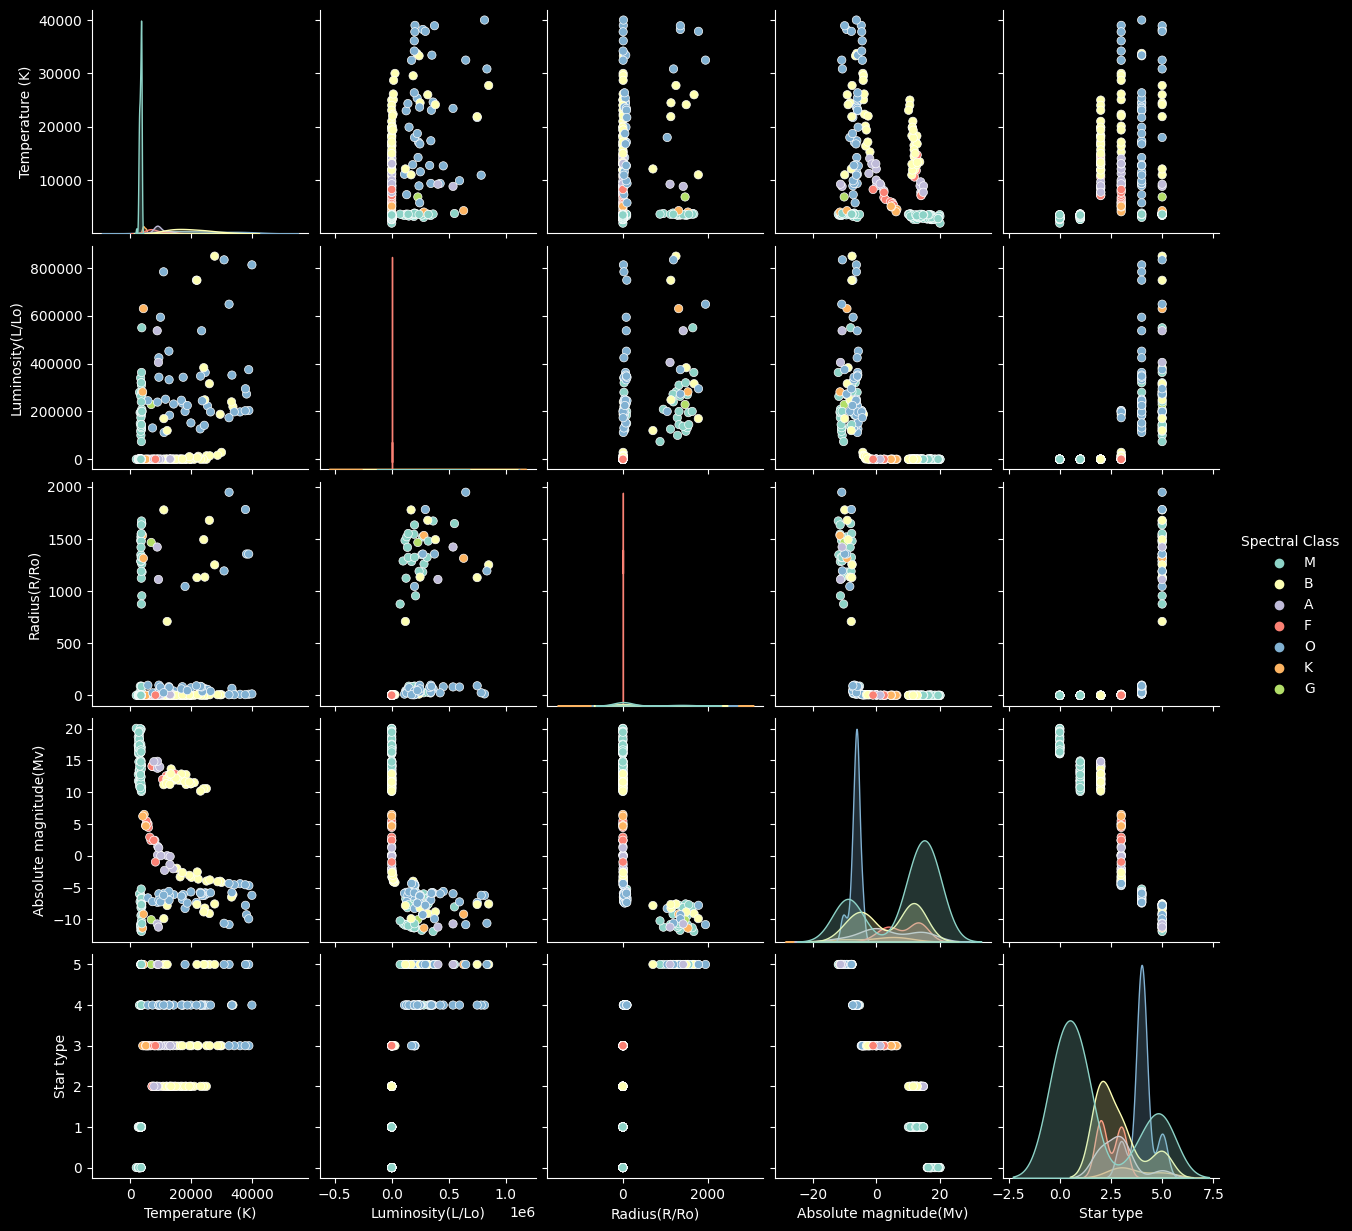

In [11]:
plt.style.use('dark_background')
sns.pairplot(df_astronomical_data, hue='Spectral Class')
plt.savefig('plots/pairplot.png')
plt.show()

#### Creating a Hertzsprung-Russel Diagram (HR Diagram)

In [12]:
temperatures = df_astronomical_data['Temperature (K)'].values
abs_magnitude = df_astronomical_data['Absolute magnitude(Mv)'].values
star_type = df_astronomical_data['Star type'].values

star_type_dict = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},
}


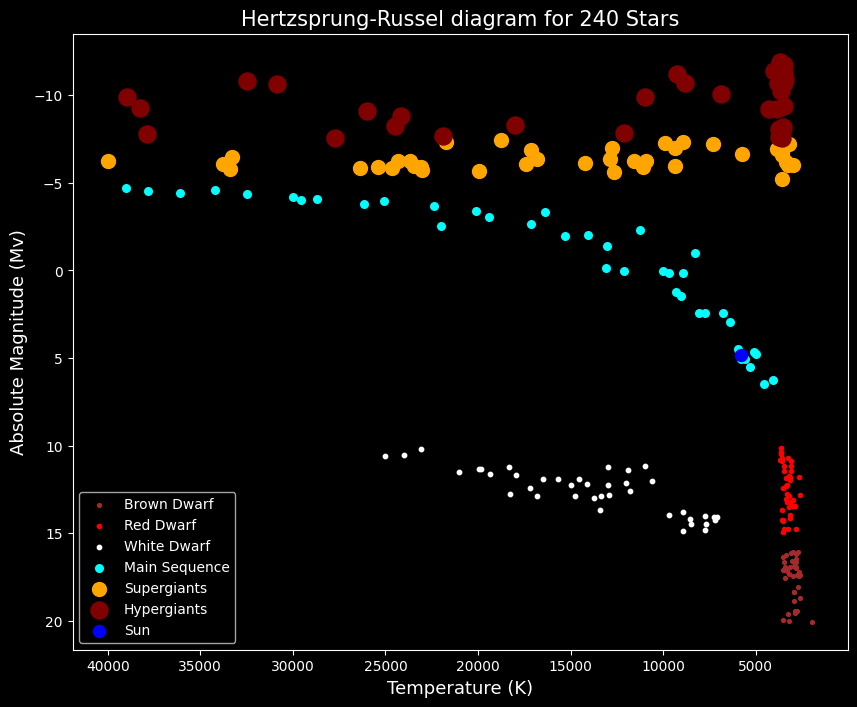

In [20]:
axes = []
labels = set()

plt.figure(figsize=(10,8))

for i in range(len(star_type)):
    properties = star_type_dict[star_type[i]]
    ax = plt.scatter(
        x=temperatures[i], 
        y=abs_magnitude[i],
        s=properties['size'],
        c=properties['color'],
        marker=properties['marker'],
        label=properties['label'],
    )

    if properties['label'] not in labels:
        axes.append(ax)
        labels.add(properties['label'])

# Adding manually the SUN
ax_sun = plt.scatter(5778, 4.83, s=75, c='blue', marker='o', label='Sun')
axes.append(ax_sun)
labels.add('Sun')
    
#Invert the axis to have the same visualization of HR Diagram
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(handles=axes)

# Adding info
plt.title(f'Hertzsprung-Russel diagram for {len(star_type)} Stars', fontsize=15)
plt.ylabel('Absolute Magnitude (Mv)', fontsize=13)
plt.xlabel('Temperature (K)', fontsize=13)

plt.savefig('plots/hr_diagram.png')
plt.show()